# Importing Liberaries

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

In [2]:
#Training Image Processing

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 6054 files belonging to 5 classes.


In [3]:
#Validation Image Processing

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2016 files belonging to 5 classes.


# Building Model

In [4]:
# Building Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [5]:
model= Sequential()

# Building Convolution Layer

In [6]:
# Building Convolution Layer
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128,128,3]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

/Users/sarthakmishra/Documents/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [8]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [9]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [10]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [11]:
model.add(Dropout(0.25))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units = 1500, activation = 'relu'))

In [14]:
model.add(Dropout(0.4))

# Output Layer

In [15]:
# Output Layer
model.add(Dense(units = 5, activation = 'softmax'))

In [16]:
# Compiling Model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         7,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,793,229 (29.73 MB)

 Trainable params: 7,793,229 (29.73 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [18]:
# Training
training_history = model.fit(x = training_set, validation_data = validation_set, epochs = 15)

Epoch 1/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 165s 865ms/step - accuracy: 0.4089 - loss: 1.5955 - val_accuracy: 0.6399 - val_loss: 0.8135
Epoch 2/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 187s 982ms/step - accuracy: 0.6637 - loss: 0.7768 - val_accuracy: 0.7421 - val_loss: 0.6033
Epoch 3/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.7345 - loss: 0.6350 - val_accuracy: 0.7688 - val_loss: 0.5355
Epoch 4/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.7680 - loss: 0.5423 - val_accuracy: 0.7862 - val_loss: 0.5260
Epoch 5/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.7837 - loss: 0.5103 - val_accuracy: 0.7584 - val_loss: 0.5660
Epoch 6/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.8163 - loss: 0.4433 - val_accuracy: 0.8046 - val_loss: 0.4603
Epoch 7/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.8363 - loss: 0.3848 - val_accuracy: 0.7713 - val_loss: 0.5678
Epoch 8/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.8489 - loss: 0.3733 - va

# Model Evaluation

In [19]:
# Model Evaluation
train_loss, train_acc = model.evaluate(training_set)

190/190 ━━━━━━━━━━━━━━━━━━━━ 65s 341ms/step - accuracy: 0.9310 - loss: 0.1617


In [20]:
print(train_loss, train_acc)

0.1543906033039093 0.935579776763916


In [21]:
val_loss, val_acc = model.evaluate(validation_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.8264 - loss: 0.5254


In [22]:
print(val_loss, val_acc)

0.5878052711486816 0.8105158805847168


In [23]:
model.save('trained_model.h5')

In [24]:
training_history.history

{'accuracy': [0.5315493941307068,
  0.6937562227249146,
  0.7497522234916687,
  0.7794846296310425,
  0.7915427684783936,
  0.826891303062439,
  0.83927983045578,
  0.8538156747817993,
  0.8544763922691345,
  0.8691774010658264,
  0.8828873634338379,
  0.894945502281189,
  0.9076643586158752,
  0.910637617111206,
  0.9184010624885559],
 'loss': [1.1278173923492432,
  0.7209415435791016,
  0.5957168936729431,
  0.5184934735298157,
  0.4894822835922241,
  0.41951388120651245,
  0.383323073387146,
  0.35881489515304565,
  0.3455028235912323,
  0.3253048062324524,
  0.2929780185222626,
  0.25094056129455566,
  0.23315580189228058,
  0.2187466323375702,
  0.203114852309227],
 'val_accuracy': [0.6398809552192688,
  0.7420634627342224,
  0.7688491940498352,
  0.786210298538208,
  0.7584325671195984,
  0.8045634627342224,
  0.7713293433189392,
  0.7782738208770752,
  0.8189483880996704,
  0.7867063283920288,
  0.8224206566810608,
  0.8179563283920288,
  0.793154776096344,
  0.7941468358039856,

In [25]:
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

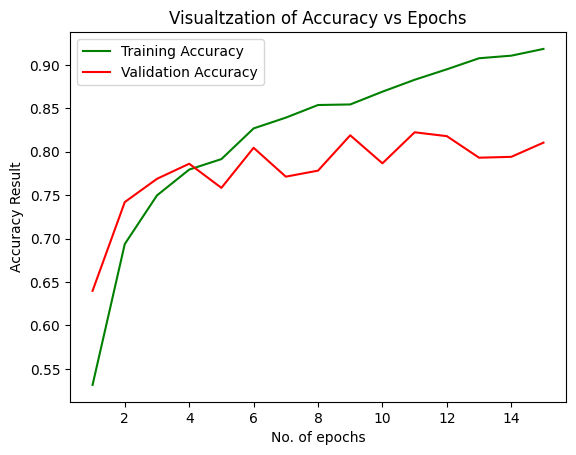

In [26]:
# Accuracy Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs, training_history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualtzation of Accuracy vs Epochs")
plt.legend()
plt.show()


In [27]:
class_name = validation_set.class_names
class_name

['Bacterial Pneumonia',
 'Corona Virus Disease',
 'Normal',
 'Tuberculosis',
 'Viral Pneumonia']

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle = False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2016 files belonging to 5 classes.


In [29]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step


(array([[9.1442965e-02, 7.9100527e-02, 2.6570604e-05, 8.1573407e-06,
         8.2942170e-01],
        [8.5464424e-01, 2.7351545e-05, 3.8397269e-05, 4.0099587e-07,
         1.4528964e-01],
        [7.3245025e-01, 2.5573143e-04, 6.4468863e-06, 3.6140016e-05,
         2.6725134e-01],
        ...,
        [1.5745444e-02, 9.3484831e-01, 9.9559352e-03, 1.5987938e-02,
         2.3462495e-02],
        [9.9719524e-02, 5.4533948e-04, 1.8581972e-02, 7.6458958e-04,
         8.8038856e-01],
        [3.7667148e-02, 2.8296374e-04, 5.0464623e-06, 1.5679878e-07,
         9.6204466e-01]], dtype=float32),
 (2016, 5))

In [30]:
predicted_categories = tf.argmax(y_pred, axis = 1)
predicted_categories

<tf.Tensor: shape=(2016,), dtype=int64, numpy=array([4, 0, 0, ..., 1, 4, 4])>

In [31]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)
true_categories

2025-03-18 12:15:03.809834: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(2016, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [32]:
Y_true = tf.argmax(true_categories, axis = 1)
Y_true

<tf.Tensor: shape=(2016,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4])>

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(Y_true, predicted_categories, target_names = class_name))

                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.71      0.63      0.67       401
Corona Virus Disease       0.88      0.93      0.91       406
              Normal       0.87      0.94      0.90       402
        Tuberculosis       0.96      0.93      0.94       406
     Viral Pneumonia       0.62      0.62      0.62       401

            accuracy                           0.81      2016
           macro avg       0.81      0.81      0.81      2016
        weighted avg       0.81      0.81      0.81      2016



In [35]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[254,   7,  11,   0, 129],
       [  0, 379,   8,  16,   3],
       [  2,   4, 376,   0,  20],
       [  1,  27,   1, 376,   1],
       [102,  12,  37,   1, 249]])

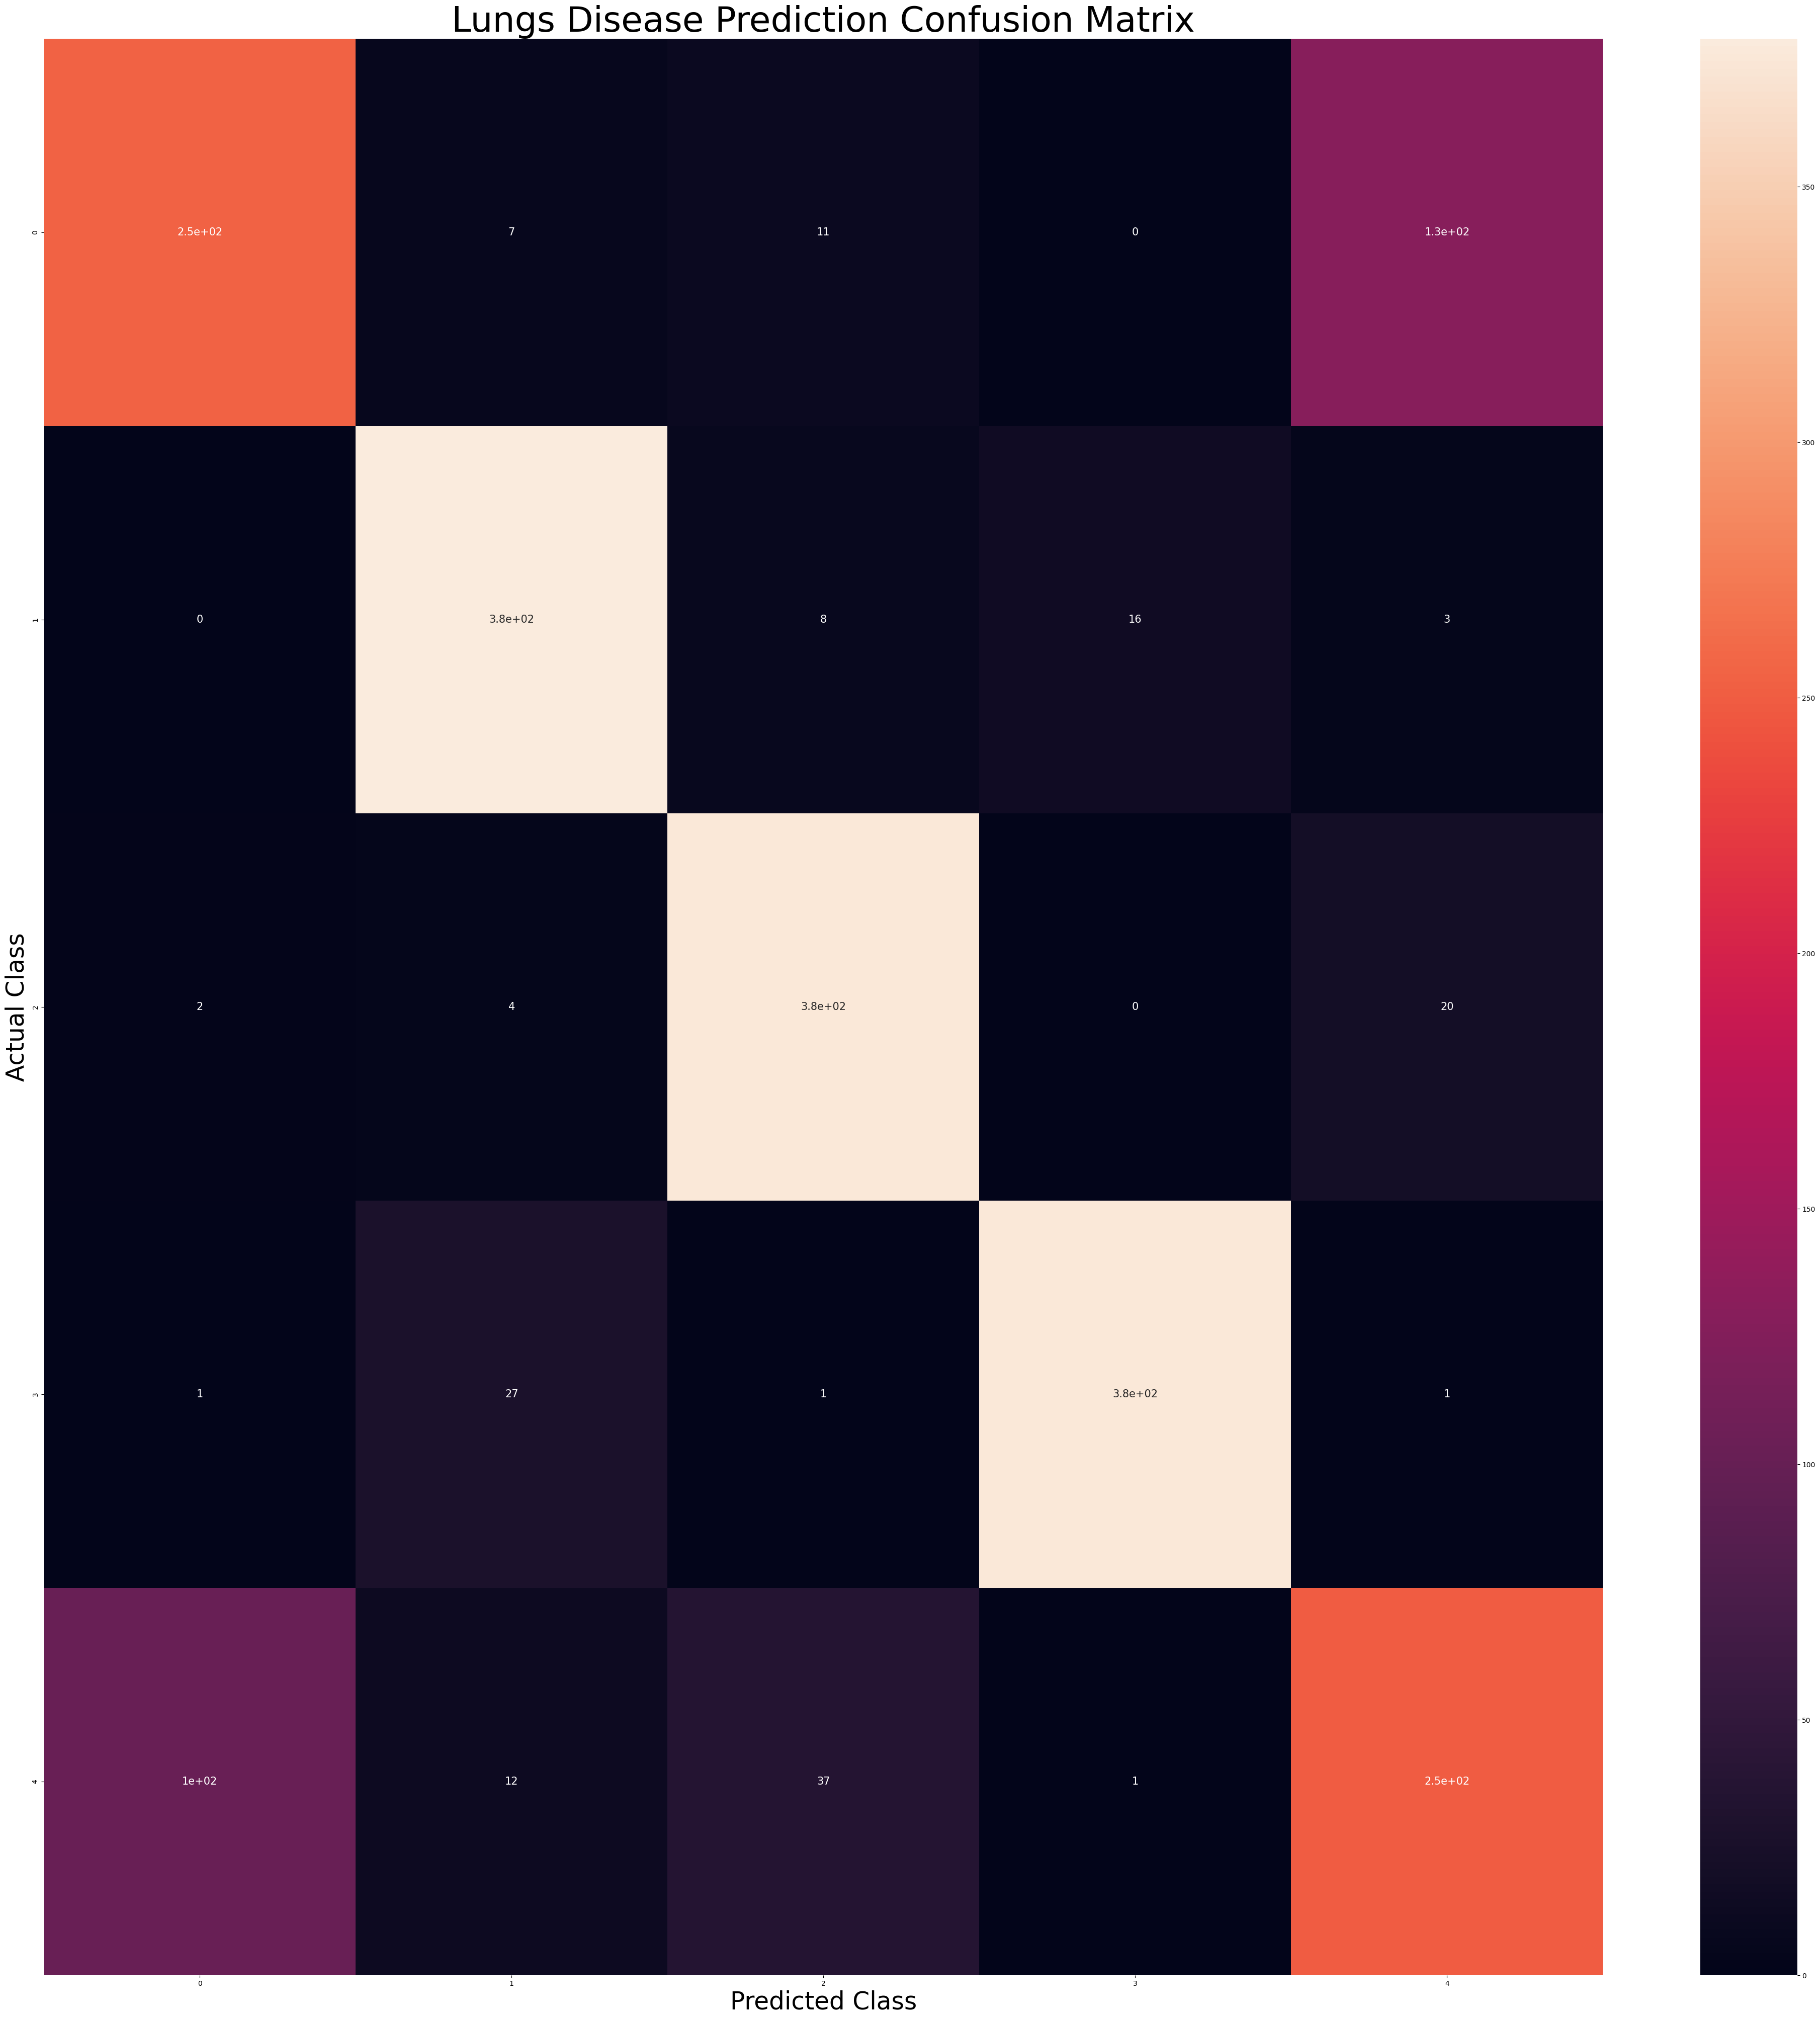

In [37]:
## Confusion Matrix Visualization
plt.figure(figsize=(50,50))
sns.heatmap(cm, annot= True, annot_kws = {'size' : 15})
plt.xlabel("Predicted Class", fontsize = 35)
plt.ylabel("Actual Class", fontsize = 35)
plt.title("Lungs Disease Prediction Confusion Matrix", fontsize = 50)
plt.show()